$Y_t = \phi Y_{t-1} + e_t$,

where $\phi$ is a constant and $e_t$ is zero mean normal.

In [2]:
import numpy as np

def AR_1_sequence(phi, n=10):
    e_t = np.random.normal()
    Y = e_t
    for _ in range(n):
        yield Y
        Y = phi*Y + np.random.normal()

In [3]:
phi = 0.8
Y = [Y_t for Y_t in AR_1_sequence(phi, n=1001)]

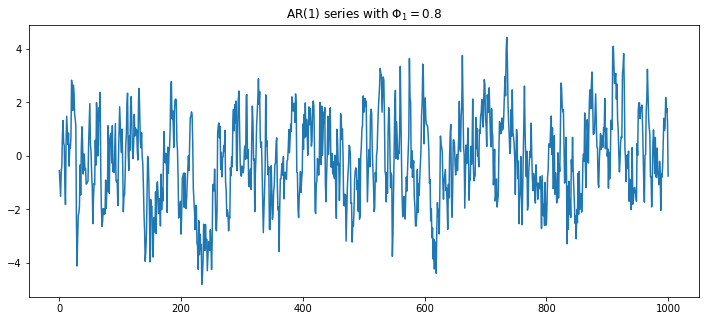

In [4]:
import matplotlib.pyplot as plt

x = [t for t in range(1001)]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(f'AR(1) series with $\\Phi_1={phi}$')
ax.plot(x, Y)
_ = plt.show()

[]

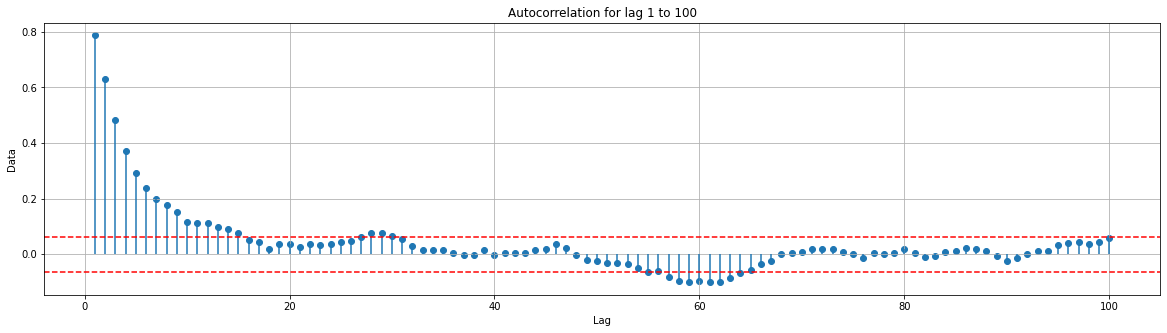

In [15]:
def autocorr(samples, lag):
        l = len(samples)
        assert(lag < l)
        
        x_bar = np.mean(samples)
        xs = samples
        s = 0
        for i in range(len(xs)-lag):
            s+=(xs[i]-x_bar)*(xs[i+lag]-x_bar)
            
        xs_var2 = sum([(x-x_bar)**2 for x in xs])
        return s/xs_var2
    
# define the autocorrelation function
def acf(samples, lim=30):
    return [autocorr(samples, k+1) for k in list(range(lim))]

# now we can plot N lags using the acf
samples = Y
N = 100
fig, axs = plt.subplots(1,1, figsize=(20, 5))
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
axs.scatter(xs, ys)
axs.vlines(xs, 0, ys)
axs.axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
axs.axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title('Autocorrelation for lag 1 to 100')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()


Auto correlation graph shows us how the correlation decreases over time.  Correlation levels off around the reciprocal of the square of degrees of freedom.

### We can see individual lags by plotting $[Y_t, Y_{t-k}]$ for lag $k < 9$
the correlation decreases until these are nearly independent.

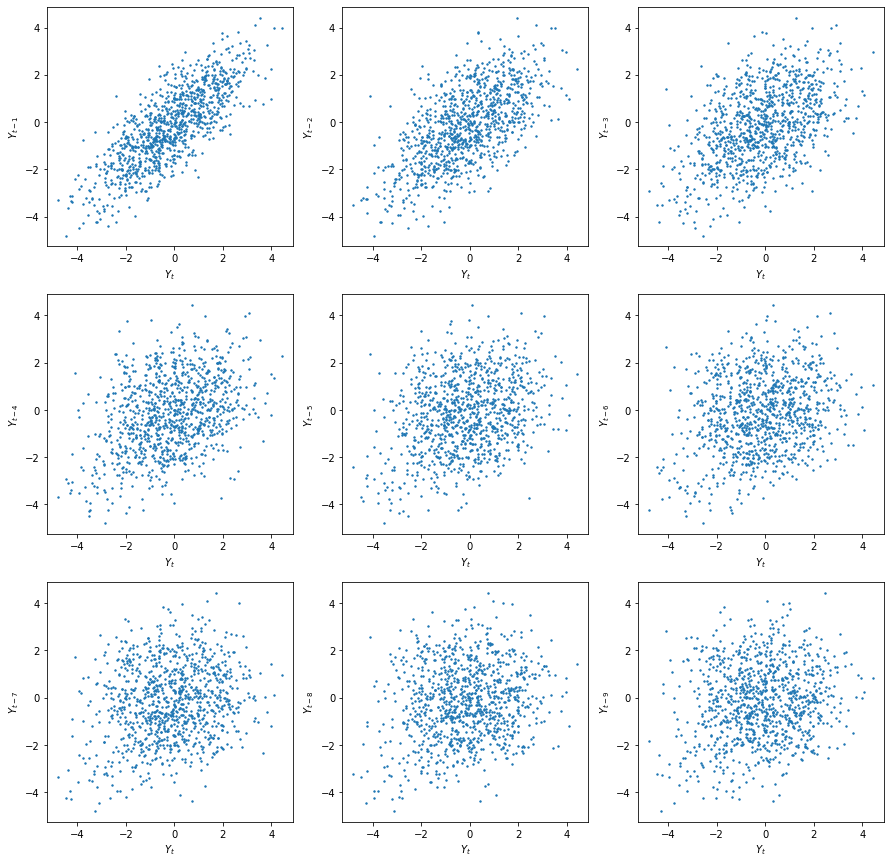

In [30]:
fig, axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.flatten()

k = 9
for i in range(k):
    Y_t = np.array(Y[i+1:], dtype=np.float64)
    Y_t_k = np.array(Y[:-(i+1)], dtype=np.float64)
    
    
    axs[i].set_xlabel('$Y_t$')
    axs[i].set_ylabel(f'$Y_{{t-{i+1}}}$')
    axs[i].scatter(Y_t, Y_t_k, s=2)

_=plt.show()

Below we can see the normalized covariace matrix of each of the autocorrelation graphs from 1 to 20.  This shows how the correlations diminish by the value of the cross-diagonal elements, which approach 0 as the two axes become more and more independent.

In [33]:
k = 20
for i in range(k):
    Y_t = np.array(Y[i+1:], dtype=np.float64)
    Y_t_k = np.array(Y[:-(i+1)], dtype=np.float64)
    
    print(f'k = {i} \n {np.corrcoef(Y_t, Y_t_k)}\n')

k = 0 
 [[1.         0.78731547]
 [0.78731547 1.        ]]

k = 1 
 [[1.         0.62968068]
 [0.62968068 1.        ]]

k = 2 
 [[1.         0.48501475]
 [0.48501475 1.        ]]

k = 3 
 [[1.         0.37190336]
 [0.37190336 1.        ]]

k = 4 
 [[1.        0.2936784]
 [0.2936784 1.       ]]

k = 5 
 [[1.         0.23822624]
 [0.23822624 1.        ]]

k = 6 
 [[1.         0.19890639]
 [0.19890639 1.        ]]

k = 7 
 [[1.         0.17646927]
 [0.17646927 1.        ]]

k = 8 
 [[1.         0.15127471]
 [0.15127471 1.        ]]

k = 9 
 [[1.         0.11554538]
 [0.11554538 1.        ]]

k = 10 
 [[1.         0.11291665]
 [0.11291665 1.        ]]

k = 11 
 [[1.         0.11226041]
 [0.11226041 1.        ]]

k = 12 
 [[1.         0.09760905]
 [0.09760905 1.        ]]

k = 13 
 [[1.         0.09201414]
 [0.09201414 1.        ]]

k = 14 
 [[1.         0.07567378]
 [0.07567378 1.        ]]

k = 15 
 [[1.         0.05211448]
 [0.05211448 1.        ]]

k = 16 
 [[1.         0.04290025]
 [0.

let $\phi = 0.1$ How is autocorrelation affected?

In [57]:
phi = 0.1
Y = [Y_t for Y_t in AR_1_sequence(phi, n=1000)]

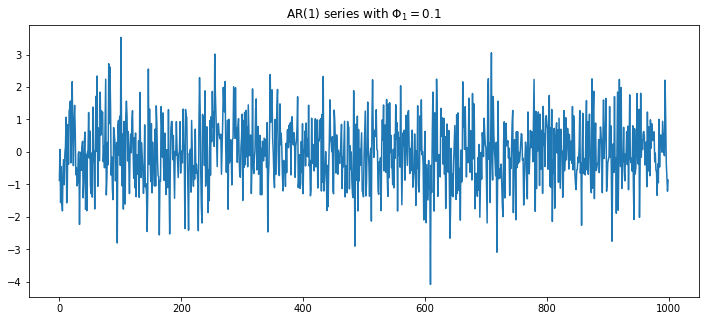

In [58]:
import matplotlib.pyplot as plt

x = [t for t in range(1000)]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(f'AR(1) series with $\\Phi_1={phi}$')
ax.plot(x, Y)
_ = plt.show()

[]

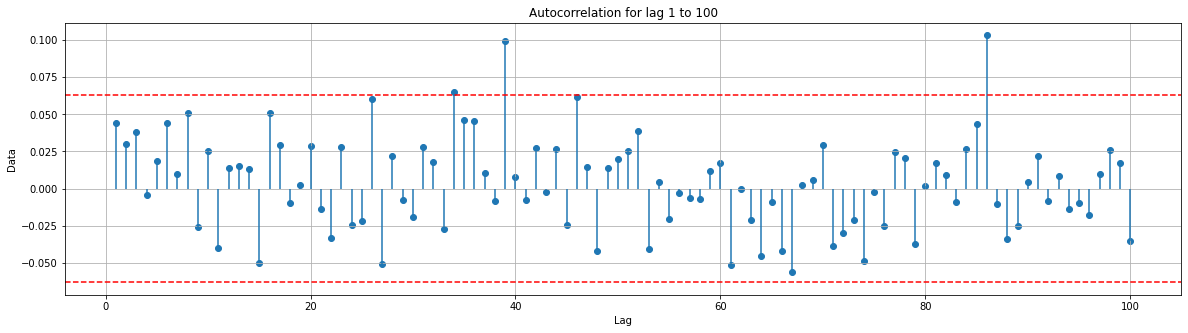

In [59]:
# now we can plot N lags using the acf
samples = Y
N = 100
fig, axs = plt.subplots(1,1, figsize=(20, 5))
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
axs.scatter(xs, ys)
axs.vlines(xs, 0, ys)
axs.axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
axs.axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title('Autocorrelation for lag 1 to 100')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()


The lagged series' are effectively uncorrelated.  Let's try a few other examples.  Let's look at $phi > 1.0$.

In [64]:
phi = 1.01
Y = [Y_t for Y_t in AR_1_sequence(phi, n=1000)]

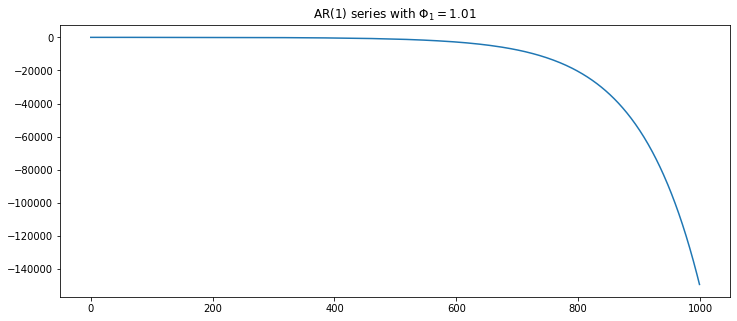

In [67]:
x = [t for t in range(1000)]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(f'AR(1) series with $\\Phi_1={phi}$')
ax.plot(x, Y)
_ = plt.show()

In [72]:
phi = 1.001
Y = [Y_t for Y_t in AR_1_sequence(phi, n=2000)]

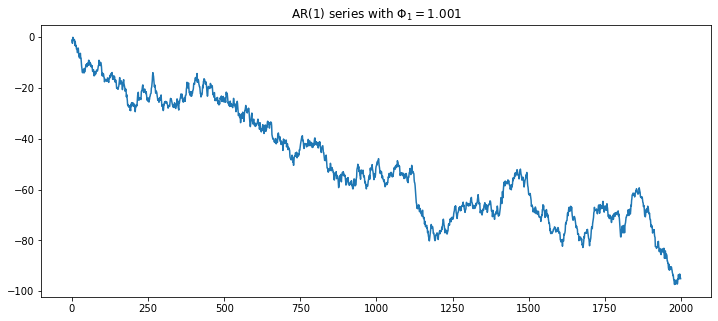

In [73]:
x = [t for t in range(2000)]
fig, ax = plt.subplots(figsize=(12,5))
ax.set_title(f'AR(1) series with $\\Phi_1={phi}$')
ax.plot(x, Y)
_ = plt.show()

basically, any $\phi > 1.0$ or $\phi < -1.0$ will generate an AR(1) process that diverges.  The farther from 1 or -1, the faster the divergence.  The divergence is an example of non-stationarity.  The AR(1) processes are only  stationary if $-1 < \phi < 1$.

[]

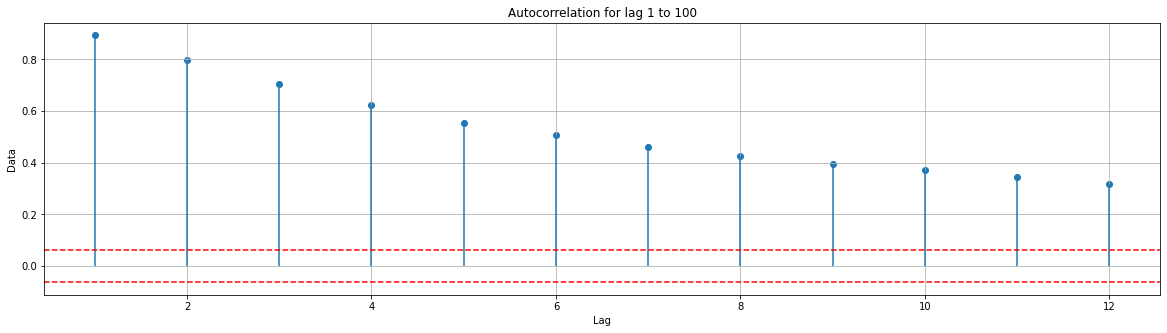

In [76]:
# examining autocorrelation for a couple of values of \phi

phi = 0.9
Y = [Y_t for Y_t in AR_1_sequence(phi, n=1000)]

samples = Y
N = 12
fig, axs = plt.subplots(1,1, figsize=(20, 5))
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
axs.scatter(xs, ys)
axs.vlines(xs, 0, ys)
axs.axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
axs.axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title('Autocorrelation for lag 1 to 100')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

[]

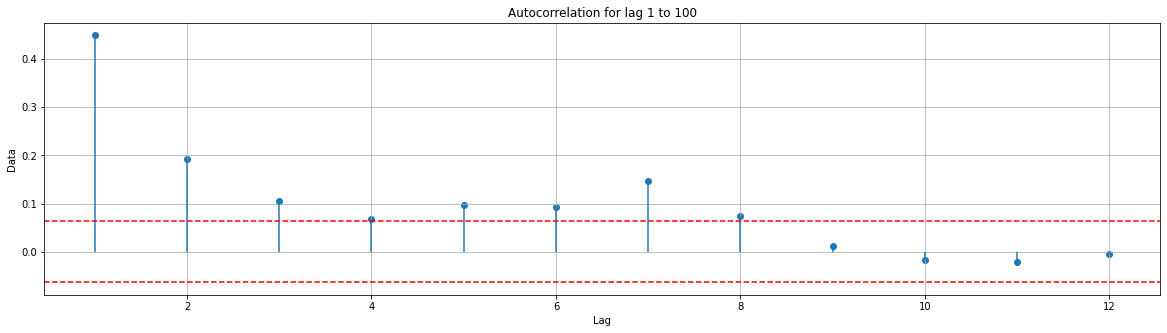

In [77]:
phi = 0.4
Y = [Y_t for Y_t in AR_1_sequence(phi, n=1000)]

samples = Y
N = 12
fig, axs = plt.subplots(1,1, figsize=(20, 5))
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
axs.scatter(xs, ys)
axs.vlines(xs, 0, ys)
axs.axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
axs.axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title('Autocorrelation for lag 1 to 100')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

[]

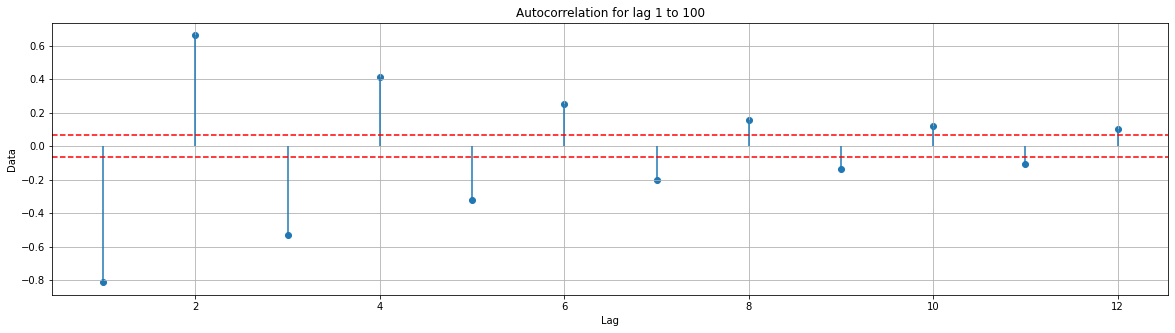

In [78]:
phi = -0.8
Y = [Y_t for Y_t in AR_1_sequence(phi, n=1000)]

samples = Y
N = 12
fig, axs = plt.subplots(1,1, figsize=(20, 5))
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
axs.scatter(xs, ys)
axs.vlines(xs, 0, ys)
axs.axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
axs.axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title('Autocorrelation for lag 1 to 100')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()

[]

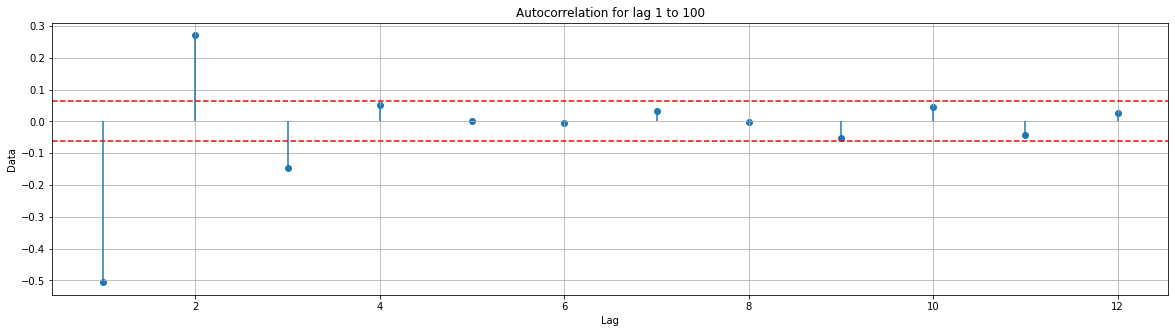

In [79]:
phi = -0.5
Y = [Y_t for Y_t in AR_1_sequence(phi, n=1000)]

samples = Y
N = 12
fig, axs = plt.subplots(1,1, figsize=(20, 5))
xs = [k+1 for k in list(range(N))]
ys = acf(samples, lim=N)
axs.scatter(xs, ys)
axs.vlines(xs, 0, ys)
axs.axhline(2/np.sqrt(len(samples)), linestyle='--', color="r")
axs.axhline(-2/np.sqrt(len(samples)), linestyle='--', color="r")

plt.title('Autocorrelation for lag 1 to 100')
plt.ylabel('Data')
plt.xlabel('Lag')
plt.grid(True)
    
plt.plot()